In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [3]:
data = pd.read_csv("credit_card_clustering.csv")

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Exploratory Data Analysis

### How many rows/columns are there?

In [5]:
data.shape

(8950, 18)

### How many customers are there?

In [6]:
data['CUST_ID'].nunique()

8950

This means, we have 8950 unique costumer IDs.

In [9]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

### How does the purchases distribution of our customers look like?

Descriptive Statistics

In [7]:
data['PURCHASES'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
10%          0.000000
20%          0.000000
30%         89.285000
40%        212.850000
50%        361.280000
60%        557.546000
70%        894.316000
80%       1422.438000
90%       2542.624000
max      49039.570000
Name: PURCHASES, dtype: float64

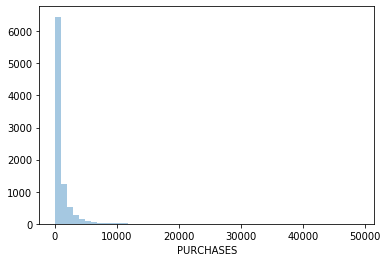

In [8]:
sns.distplot(data['PURCHASES'], kde=False)

The amount of purchases made from the account ranges from 0 to 49000 with an average(median) of 360.

The distribution is highly skewed.

### How does the cedit balance distribution of our customers look like?

In [12]:
data['BALANCE'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
10%         23.575529
20%         77.238026
30%        207.176552
40%        467.021989
50%        873.385231
60%       1207.815587
70%       1698.588855
80%       2571.434263
90%       4338.563657
max      19043.138560
Name: BALANCE, dtype: float64

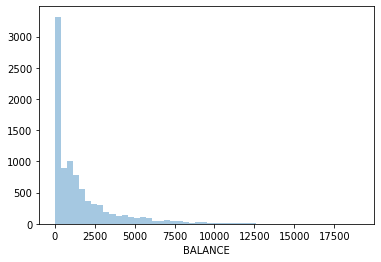

In [14]:
sns.distplot(data['BALANCE'], kde=False)

The credit balance ranges from 0 to 19000 with an average (median) balance credit of 873.

The distribution is highly skewed.

In [16]:
data['CREDIT_LIMIT'].describe(np.arange(0.1,1,0.1))

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
10%       1200.000000
20%       1500.000000
30%       2000.000000
40%       2500.000000
50%       3000.000000
60%       4200.000000
70%       6000.000000
80%       7000.000000
90%       9500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [23]:
data['CREDIT_LIMIT'].fillna(value=3000, inplace=True)

In [24]:
data['CREDIT_LIMIT'].isna().sum()

0

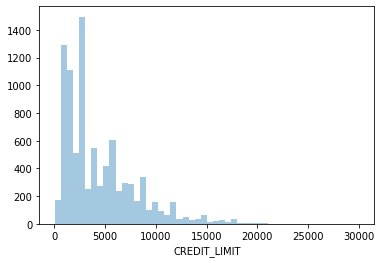

In [25]:
sns.distplot(data['CREDIT_LIMIT'], kde=False)

The credit limit of the credit card holders varies from 50 to 30000  with an average(median) of 3000 .

# Clustering

In [26]:
from sklearn.cluster import KMeans

In [27]:
# Get features we need #never fit all the features
features = ['BALANCE', 'PURCHASES','CREDIT_LIMIT']
X = data[features]

# Convert categorical to numeric
# X = pd.get_dummies(X_raw)
# X_raw.head()

X.head()

,BALANCE,PURCHASES,CREDIT_LIMIT
0,40.900749,95.40,1000.0
1,3202.467416,0.00,7000.0
2,2495.148862,773.17,7500.0
3,1666.670542,1499.00,7500.0
4,817.714335,16.00,1200.0


### Choosing Optimal *k*

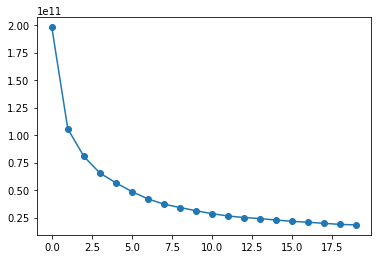

In [28]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

Using the elbow method, I decided to use *k=4*.

In [29]:
# Clustering using KMeans. We choose 4 clusters
#no y
#no train_split_test
km = KMeans(n_clusters= 4, random_state = 42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [30]:
new_data['labels'].value_counts()

0    5412
2    2696
1     810
3      32
Name: labels, dtype: int64

# Deep Dive to each cluster

In [31]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,BALANCE,PURCHASES,CREDIT_LIMIT,labels
count,5412.000000,5412.000000,5412.000000,5412.0
mean,798.329877,537.687267,2154.598526,0.0
std,806.641987,795.973653,1022.214458,0.0
min,0.000000,0.000000,50.000000,0.0
25%,75.362124,4.942500,1200.000000,0.0
50%,562.717218,253.535000,2000.000000,0.0
75%,1277.637585,684.887500,3000.000000,0.0
max,3676.070324,8591.310000,4800.000000,0.0


Cluster 0: *The Low key holders* : 
Lowest Balance, Lowest Purchases, Lowest Credit Limit

In [32]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,BALANCE,PURCHASES,CREDIT_LIMIT,labels
count,810.000000,810.000000,810.000000,810.0
mean,5246.475041,2119.038741,12449.567901,1.0
std,3577.100847,2748.056930,3010.160452,0.0
min,0.488050,0.000000,7000.000000,1.0
25%,2358.057315,127.267500,10000.000000,1.0
50%,5548.632263,992.980000,12000.000000,1.0
75%,7653.569882,3238.142500,14000.000000,1.0
max,18495.558550,12650.000000,30000.000000,1.0


Cluster 1: *The Conservatives* : High Balance, Average Purchases, High Credit Limit


In [40]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,BALANCE,PURCHASES,CREDIT_LIMIT,labels
count,2696.000000,2696.000000,2696.000000,2696.0
mean,1950.344609,1325.015823,6668.913542,2.0
std,1856.794799,1809.142431,1614.109436,0.0
min,0.000000,0.000000,2800.000000,2.0
25%,226.267275,97.550000,5500.000000,2.0
50%,1492.438292,671.800000,6500.000000,2.0
75%,3325.120749,1850.872500,7500.000000,2.0
max,7499.303650,15704.040000,11500.000000,2.0


Cluster 2: *The Practical Spenders* : High Balance, Average Purchases, Average Credit Limit

In [41]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,BALANCE,PURCHASES,CREDIT_LIMIT,labels
count,32.000000,32.000000,32.000000,32.0
mean,5428.580069,24376.741562,15612.500000,3.0
std,4298.544566,9074.572127,5338.403168,0.0
min,1127.643812,13771.630000,7500.000000,3.0
25%,2535.027786,16834.025000,12000.000000,3.0
50%,3422.898250,22440.985000,15750.000000,3.0
75%,7858.390369,27832.235000,18000.000000,3.0
max,19043.138560,49039.570000,30000.000000,3.0


Cluster 3: *You-only-live-once holders* : High Balance, Highest Purchase, Highest Credit Limit